In [2]:
import numpy as np
import math 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Produce the minimum dark matter velocity 
amu_to_eV = 931.5*1e6 #eV/c**2
GeV = 1e9; KeV = 1e3

def MIGDAL_vmin(mN, ER,delE, mDM):
    return (mN*ER+redMass(mN,mDM)*delE)/(redMass(mN,mDM)*math.sqrt(2*mN*ER))
def MIGDAL_delE(mN, ER, vmin, mDM):
    return (vmin*redMass(mN,mDM)*math.sqrt(2*mN*ER)-mN*ER)/redMass(mN,mDM)

def MIGDAL_vmin_UOM(mN, ER,delE, mDM):
    return math.sqrt(mN*ER/ (2*redMass(mN,mDM)**2)) + delE/math.sqrt(2*mN*ER)

def redMass(mN,mDM):
    return (mN*mDM)/(mN+mDM)
def electron_transition_upperlimit(mN,mDM, vDM):
    return 0.5*(redMass(mN,mDM)*vDM**2)

In [4]:
Targets = {'Xe': {'mN': 131.293*amu_to_eV, 'Z': 54, 'A': 131.293, 'rho': 0.005458, 'sigma': 1.0e-45, 'color': 'blue'},
           'Ar': {'mN': 39.948*amu_to_eV, 'Z': 18, 'A': 39.948, 'rho': 0.001784, 'sigma': 1.0e-45, 'color': 'red'},
           'Na': {'mN': 22.989769*amu_to_eV, 'Z': 11, 'A': 22.989769, 'rho': 0.971, 'sigma': 1.0e-45, 'color': 'green'},
           'I' : {'mN': 126.90447*amu_to_eV, 'Z': 53, 'A': 126.90447, 'rho': 4.93, 'sigma': 1.0e-45, 'color': 'purple'},}

37.211562


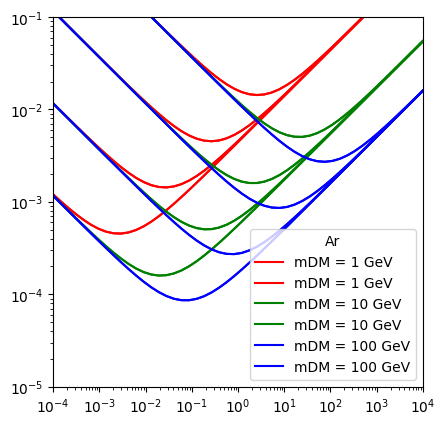

In [7]:
mN = Targets['Ar']['mN']
print(mN/GeV)

fig, ax = plt.subplots()
colors = {1*GeV:'r', 10*GeV:'g', 100*GeV:'b'}
labels = {1*GeV:'mDM = 1 GeV', 10*GeV:'mDM = 10 GeV', 100*GeV:'mDM = 100 GeV'}
for mDM in [1*GeV, 10*GeV,100*GeV]:
    for delE in [0.1*KeV,1*KeV,10*KeV,100*KeV]:
        x, y, y_uom = np.logspace(-4,4, base=10.0, num = 50), [], []
        for ER in x:
            # x.append(ER)
            y.append(MIGDAL_vmin(mN, ER*KeV, delE, mDM))
            y_uom.append(MIGDAL_vmin_UOM(mN, ER*KeV, delE, mDM))
        if delE == 0.1*KeV:
            ax.plot(x,y, color = colors[mDM], label = labels[mDM])
            ax.plot(x,y_uom, color = colors[mDM], label = labels[mDM])
        else:
            ax.plot(x,y, color = colors[mDM])
            ax.plot(x,y_uom, color = colors[mDM])
ax.set_yscale('log'); ax.set_xscale('log')
ax.set_ylim(1e-5,1e-1)
ax.set_xlim(1e-4,1e4)
ax.set_aspect(8/4)
ax.legend(title='Ar')

37.211562


NameError: name 'keV' is not defined

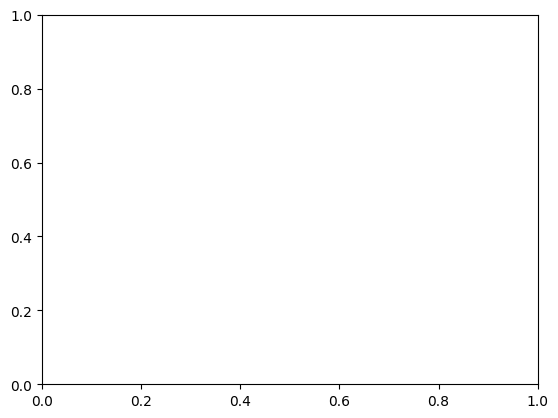

In [11]:
mN = Targets['Ar']['mN']
print(mN/GeV)

fig, ax = plt.subplots()
colors = {1*GeV:'r', 10*GeV:'g', 100*GeV:'b'}
labels = {1*GeV:'mDM = 1 GeV', 10*GeV:'mDM = 10 GeV', 100*GeV:'mDM = 100 GeV'}
for mDM in [1*GeV, 10*GeV,100*GeV]:
    for vmin in [1e-3, 2e-3]:
        x, y = np.logspace(-5,4, base=10.0, num = 100), []
        for ER in x:
            # x.append(ER)
            y.append(MIGDAL_delE(mN, ER*keV, vmin, mDM))
        if vmin == 1e-3:
            ax.plot(x,y, color = colors[mDM], label = labels[mDM])
        else:
            ax.plot(x,y, color = colors[mDM], linestyle='--')
ax.set_yscale('log'); ax.set_xscale('log')
# ax.set_ylim(1e-5,1e-1)
ax.set_xlim(1e-5,1e4)
ax.set_aspect(8/4)
ax.legend(title='Ar')

NameError: name 'keV' is not defined

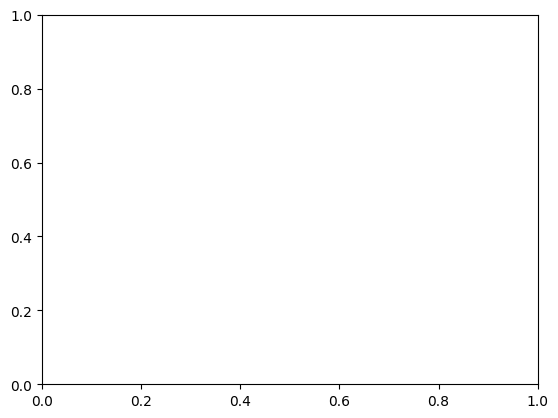

In [12]:
mN = Targets['Ar']['mN']
fig, ax = plt.subplots()
colors = {1*GeV:'r', 10*GeV:'g', 100*GeV:'b'}
labels = {1*GeV:'mDM = 1 GeV', 10*GeV:'mDM = 10 GeV', 100*GeV:'mDM = 100 GeV'}
for mDM in [1*GeV, 10*GeV,100*GeV]:
    for vmin in [1e-3, 2e-3]:
        x, y = np.logspace(-5,4, base=10.0, num = 100), []
        for ER in x:
            # x.append(ER)
            y.append(MIGDAL_delE(mN, ER*keV, vmin, mDM))
        if vmin == 1e-3:
            ax.plot(x,y, color = colors[mDM], label = labels[mDM])
        else:
            ax.plot(x,y, color = colors[mDM], linestyle='--')
ax.set_yscale('log'); ax.set_xscale('log')
# ax.set_ylim(1e-5,1e-1)
ax.set_xlim(1e-5,1e4)
ax.set_aspect(8/4)
ax.legend(title='Ar')

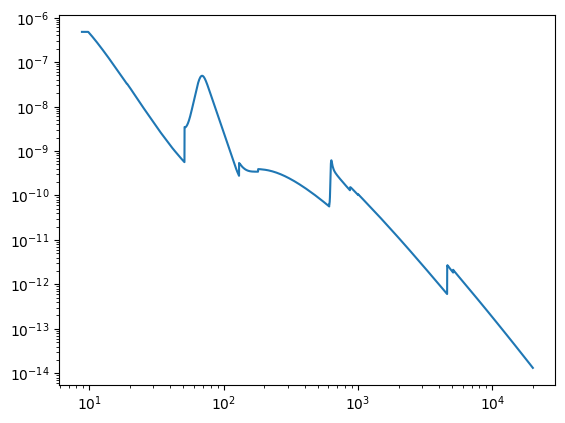

In [13]:
import glob
import os
with open(glob.glob('../sensitivity_studies/migdal_prob/i_tot_prob.dat')[0]) as f:
    x, y = [], []
    for line in f:
        line = line.split()
        x.append(float(line[0]))
        y.append(float(line[1]))
plt.plot(x,y)
plt.xscale('log')
plt.yscale('log')

../sensitivity_studies/migdal_prob/na_nl10.dat sdsd
../sensitivity_studies/migdal_prob/na_nl20.dat sdsd
../sensitivity_studies/migdal_prob/na_nl21.dat
../sensitivity_studies/migdal_prob/na_nl30.dat sdsd
../sensitivity_studies/migdal_prob/i_nl10.dat sdsd
../sensitivity_studies/migdal_prob/i_nl20.dat sdsd
../sensitivity_studies/migdal_prob/i_nl21.dat
../sensitivity_studies/migdal_prob/i_nl31.dat sdsd
../sensitivity_studies/migdal_prob/i_nl30.dat
../sensitivity_studies/migdal_prob/i_nl32.dat
../sensitivity_studies/migdal_prob/i_nl40.dat sdsd
../sensitivity_studies/migdal_prob/i_nl41.dat
../sensitivity_studies/migdal_prob/i_nl42.dat
../sensitivity_studies/migdal_prob/i_nl51.dat sdsd
../sensitivity_studies/migdal_prob/i_nl50.dat


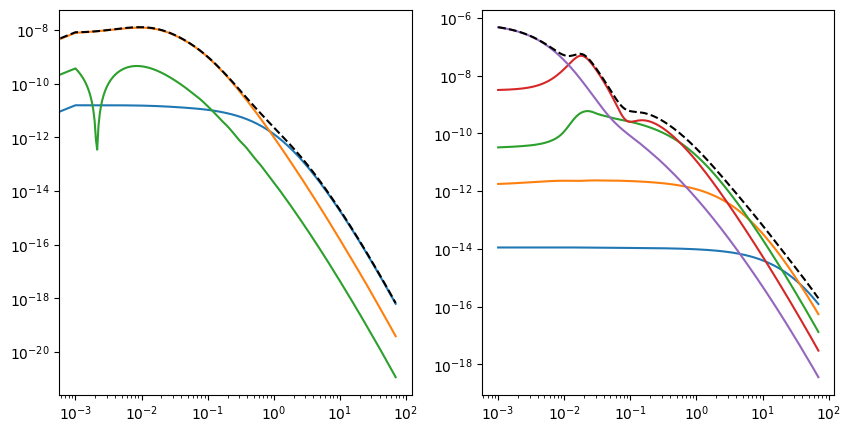

In [35]:
files_na = {}; files_i = {}
summed_na = {}; summed_i = {}

fig,ax = plt.subplots(1,2, figsize=(10,5))
for n in [1,2,3]:
    files_na[n] = glob.glob(f'../sensitivity_studies/migdal_prob/na_nl{n}*')

ytotal = []
for idx in [1,2,3]:
    x, y = [], []
    for file in files_na[idx]:
        if len(x) == 0:
            print(file, 'sdsd')
            with open(file) as f:
                for line in f:
                    line = line.split()
                    x.append(float(line[0])/KeV)
                    y.append(float(line[1]))
        else:
            print(file)
            with open(file) as f:
                tempy = []
                for line in f:
                    line = line.split()
                    tempy.append(float(line[1]))
            y = [y[i] + tempy[i] for i in range(len(y))]

    if ytotal == []:
        ytotal = y
    else:
        ytotal = [ytotal[i] + y[i] for i in range(len(y))]
    
    summed_na[idx] = {'x':x, 'y':y}
    ax[0].plot(x,y, label = f'i_nl{idx}')

summed_na[-1] = {'x':x, 'y':ytotal}
ax[0].plot(x,summed_na[-1]['y'], label = f'i_nl{idx}', color = 'black', linestyle='--')
ax[0].set_xscale('log') ; ax[0].set_yscale('log')


for i in [1,2,3,4,5]:
    files_i[i] = glob.glob(f'../sensitivity_studies/migdal_prob/i_nl{i}*')


ytotal=[]
for idx in [1,2,3,4,5]:
    x, y = [], []
    for file in files_i[idx]:
        if len(x) == 0:
            print(file, 'sdsd')
            with open(file) as f:
                for line in f:
                    line = line.split()
                    x.append(float(line[0])/KeV)
                    y.append(float(line[1]))
        else:
            print(file)
            with open(file) as f:
                tempy = []
                for line in f:
                    line = line.split()
                    tempy.append(float(line[1]))
            y = [y[i] + tempy[i] for i in range(len(y))]
    if ytotal == []:
        ytotal = y
    else:
        ytotal = [ytotal[i] + y[i] for i in range(len(y))]
    summed_i[idx] = {'x':x, 'y':y}
    ax[1].plot(x,y, label = f'i_nl{idx}')
summed_i[-1] = {'x':x, 'y':ytotal}
ax[1].plot(x,summed_i[-1]['y'], label = f'i_nl{idx}', color = 'black', linestyle='--')
ax[1].set_xscale('log') ; ax[1].set_yscale('log')



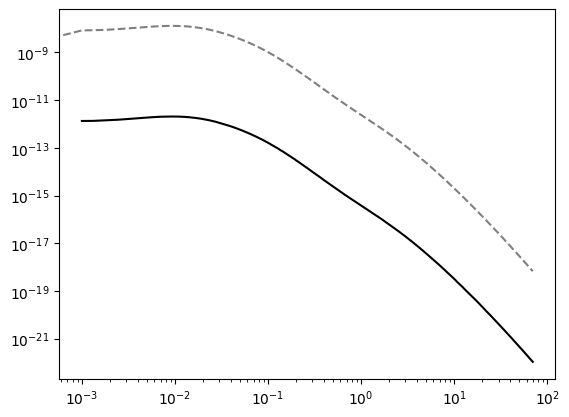

In [38]:
fig, ax = plt.subplots()

ax.set_xscale('log')
ax.set_yscale('log')
# plt.xlim(1e-3,1e1)
# plt.ylim(1e-13,1e-7)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


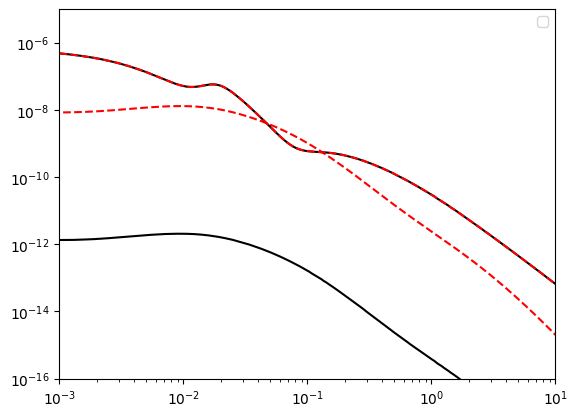

In [52]:
fig, ax = plt.subplots()

with open(glob.glob('../sensitivity_studies/migdal_prob/na_prob_energy_kev.dat')[0]) as f:
    x, y = [], []
    for line in f:
        line = line.split()
        x.append(float(line[0]))
        y.append(float(line[1]))
ax.plot(x,y, color = 'black')
ax.plot(summed_na[-1]['x'],summed_na[-1]['y'], color = 'red', linestyle='--')

with open(glob.glob('../sensitivity_studies/migdal_prob/i_prob_energy_kev.dat')[0]) as f:
    x, y = [], []
    for line in f:
        line = line.split()
        x.append(float(line[0]))
        y.append(float(line[1]))
ax.plot(x,y, color = 'black', linestyle='solid')
ax.plot(summed_i[-1]['x'],summed_i[-1]['y'], color = 'red', linestyle='--')

ax.set_xscale('log')
ax.set_yscale('log')
plt.xlim(1e-3,1e1)
plt.ylim(1e-16,1e-5)
ax.legend()


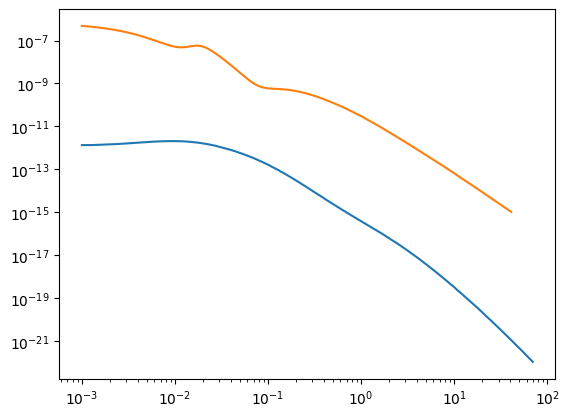

In [ ]:
with open(glob.glob('../sensitivity_studies/migdal_prob/na_prob_energy_kev.dat')[0]) as f:
    x, y = [], []
    for line in f:
        line = line.split()
        x.append(float(line[0]))
        y.append(float(line[1]))
plt.plot(x,y)
plt.xscale('log')
plt.yscale('log')

with open(glob.glob('../sensitivity_studies/migdal_prob/i_prob_energy_kev.dat')[0]) as f:
    x, y = [], []
    for line in f:
        line = line.split()
        x.append(float(line[0]))
        y.append(float(line[1]))
plt.plot(x,y)
plt.xscale('log')
plt.yscale('log')

In [8]:
from targets import na
vmins = [(c*1.E-3)*(math.sqrt(Target.mT()*ER/(2*Target.mu_T(mX)**2)) + Target.eNL()[i]/math.sqrt(2*Target.mT()*ER)) for i in range(len(Target.eNL()))]


NameError: name 'Target' is not defined